## PROJECT :

## Four major parts of this project :¶
 ### 1.Data understanding
### 2.Data cleaning
### 3.Data Analysis
### 4.Recommendations

## 1. DATA UNDERSTANDING


## Import libraries

In [708]:
import pandas as pd 
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [710]:
warnings.filterwarnings('ignore')

## Read the Housing dataset :

In [713]:
df=pd.read_csv('housing.csv')

## Basic Information of dataset - Totally 4600 Rows and 18 Columns 

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

## Check the duplicates

In [719]:
df.duplicated().sum()

0

In [721]:
df.columns.to_list()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

## Rename the table header names :

In [724]:
df.rename(columns={'date':'Registration_Date',
 'price':'Price',
 'bedrooms':'Bedrooms',
 'bathrooms':'Bathrooms',
 'sqft_living':'SQFT_Living',
 'sqft_lot':'Overall_Lot_SQFT',
 'floors':'Floors',
 'waterfront':'Waterfront',
 'view':'View',
 'condition':'Condition',
 'sqft_above':'Above_SQFT',
 'sqft_basement':'Basement_SQFT',
 'yr_built':'Built_Year',
 'yr_renovated':'Renovated_Year',
 'street':'Street',
 'city':'City',
 'statezip':'State_Zip',
 'country':'Country'},inplace=True)

In [726]:
df.isnull().sum()

Registration_Date     0
Price                 0
Bedrooms              0
Bathrooms             0
SQFT_Living          40
Overall_Lot_SQFT     14
Floors                0
Waterfront            0
View                  0
Condition             0
Above_SQFT            0
Basement_SQFT         0
Built_Year           23
Renovated_Year        0
Street                0
City                 57
State_Zip             0
Country               0
dtype: int64

## Drop the table values for remove nulls

In [729]:
df.dropna(inplace=True)

## Datatype changed for Registration date 

In [732]:
df['Registration_Date']=pd.to_datetime(df['Registration_Date'],dayfirst=True,format='mixed')

In [734]:
def date_cleaning_function(date):
    date_of=date.strftime('%d-%m-%Y')
    return date_of

In [736]:
df['Registration_Date']=df['Registration_Date'].apply(date_cleaning_function)

In [738]:
df['Registration_Date']=pd.to_datetime(df['Registration_Date'],dayfirst=True,format='mixed')

In [740]:
df['Registration_Date']

67     2014-05-03
68     2014-05-04
69     2014-05-04
70     2014-05-04
71     2014-05-04
          ...    
4572   2014-07-02
4573   2014-07-02
4574   2014-07-02
4575   2014-07-02
4576   2014-07-02
Name: Registration_Date, Length: 4510, dtype: datetime64[ns]

In [742]:
min_value = df['Built_Year'].min()
print(min_value)

1900.0


In [744]:
df['Built_Year'] = df['Built_Year'].replace(np.nan,1900).astype(int)

In [746]:
df['City'] = df['City'].replace(np.nan,"None")

## Roundup and change the datatype in bathroom and floor: 

In [749]:
df['Bathrooms']=np.ceil(df['Bathrooms']).astype(int)

In [751]:
df['Floors']=np.ceil(df['Floors']).astype(int)

In [753]:
df['Built_Year']=df['Built_Year'].astype(int)

## After remove nulls and changing the datatype 

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4510 entries, 67 to 4576
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Registration_Date  4510 non-null   datetime64[ns]
 1   Price              4510 non-null   float64       
 2   Bedrooms           4510 non-null   int64         
 3   Bathrooms          4510 non-null   int32         
 4   SQFT_Living        4510 non-null   float64       
 5   Overall_Lot_SQFT   4510 non-null   float64       
 6   Floors             4510 non-null   int32         
 7   Waterfront         4510 non-null   int64         
 8   View               4510 non-null   int64         
 9   Condition          4510 non-null   int64         
 10  Above_SQFT         4510 non-null   int64         
 11  Basement_SQFT      4510 non-null   int64         
 12  Built_Year         4510 non-null   int32         
 13  Renovated_Year     4510 non-null   int64         
 14  Street      

## Change the O and 1 into 'Yes' and 'No'

In [759]:
df['Changed_waterfront']=df['Waterfront'].apply(lambda x: 'Yes' if x==1 else 'No')

In [761]:
df['Changed_waterfront']

67      No
68      No
69      No
70      No
71      No
        ..
4572    No
4573    No
4574    No
4575    No
4576    No
Name: Changed_waterfront, Length: 4510, dtype: object

In [763]:
condition_mapping = {
    1: "Poor",
    2: "Fair",
    3: "Average",
    4: "Good",
    5: "Excellent"}
df['Condition'] = df['Condition'].map(condition_mapping)

In [765]:
condition_mapping
df['Condition']

67           Good
68        Average
69      Excellent
70        Average
71        Average
          ...    
4572      Average
4573      Average
4574      Average
4575      Average
4576    Excellent
Name: Condition, Length: 4510, dtype: object

In [767]:
df['Condition'] = df['Condition'].astype(str)

In [768]:
view_mapping = {
    0: "No view",
    1: "Poor view",
    2: "Average view",
    3: "Good view",
    4: "Excellent view"}
df['View'] = df['View'].map(view_mapping).astype(str)

In [1048]:
df['month'] = df['Registration_Date'].dt.month

In [1050]:
df['month']

0       5
1       5
2       5
3       5
4       5
       ..
3602    7
3603    7
3604    7
3605    7
3606    7
Name: month, Length: 3361, dtype: int32

In [1054]:
df['month'] = df['month'].map({5: 'May', 6: 'June',7:'July'})

In [1056]:
df

,Registration_Date,Price,Bedrooms,Bathrooms,SQFT_Living,Overall_Lot_SQFT,Floors,Waterfront,View,Condition,...,Basement_SQFT,Built_Year,Renovated_Year,Street,City,State_Zip,Country,Changed_waterfront,age_of_Property,month
0,2014-05-03,310000,3,1,1010.0,9945.0,1,0,No view,Good,...,0,1973,0,7528 N Fork Rd SE,Snoqualmie,WA 98065,USA,No,52,May
1,2014-05-04,775000,2,3,2680.0,7392.0,1,0,No view,Average,...,0,2004,2003,13134 234th Ct NE,Redmond,WA 98053,USA,No,21,May
2,2014-05-04,365000,3,3,2200.0,7350.0,1,0,No view,Excellent,...,630,1988,0,13420 SE 182nd St,Renton,WA 98058,USA,No,37,May
3,2014-05-04,331950,4,3,2530.0,9933.0,2,0,Average view,Average,...,520,1990,2009,925 48th Ct,Auburn,WA 98092,USA,No,35,May
4,2014-05-04,783500,3,3,2850.0,7130.0,2,0,No view,Average,...,860,1980,0,151 Euclid Ave,Seattle,WA 98122,USA,No,45,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,2014-07-02,318000,2,2,1530.0,3503.0,1,0,Poor view,Good,...,700,1916,0,1922 11th Ave W,Seattle,WA 98119,USA,No,109,July
3603,2014-07-02,550608,4,2,1660.0,4800.0,2,0,No view,Average,...,0,1922,2008,4007 Woodland Park Ave N,Seattle,WA 98103,USA,No,103,July
3604,2014-07-02,584000,3,2,1490.0,1036.0,2,0,No view,Average,...,400,2008,0,4304B 36th Ave W,Seattle,WA 98199,USA,No,17,July
3605,2014-07-02,465000,3,1,1520.0,9030.0,1,0,No view,Average,...,0,1956,2001,2533 155th Pl SE,Bellevue,WA 98007,USA,No,69,July


## In price column change the '0' by using median 

In [864]:
median_price = df.loc[df['Price'] != 0, 'Price'].median()
df['Price'] = df['Price'].replace(0, median_price)

In [866]:
df['Price'] = np.ceil(df['Price']).astype(int)

In [868]:
df['Price']

0       310000
1       775000
2       365000
3       331950
4       783500
         ...  
3602    318000
3603    550608
3604    584000
3605    465000
3606    245000
Name: Price, Length: 3417, dtype: int32

In [874]:
checking_cloumns=['Price','SQFT_Living','Overall_Lot_SQFT','Above_SQFT','Basement_SQFT']
def outliers_removing_function(df,columns,inplace=True):
    for i in columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    return df

In [876]:
df=outliers_removing_function(df,checking_cloumns)

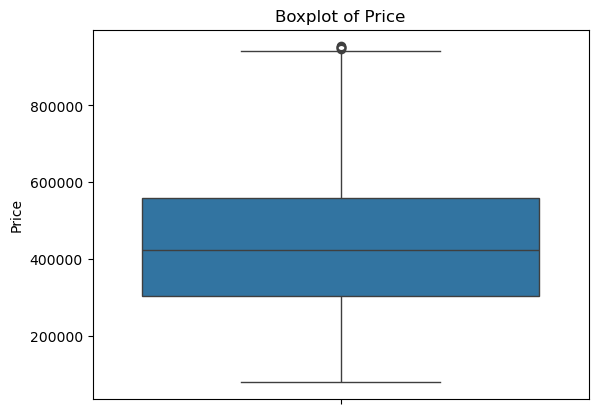

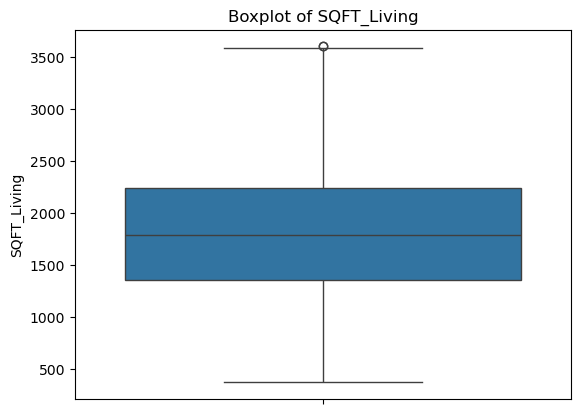

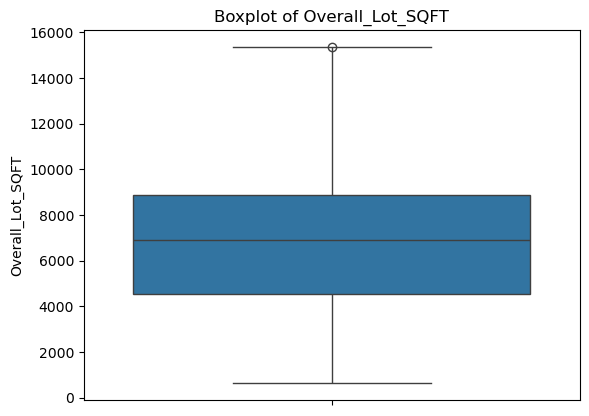

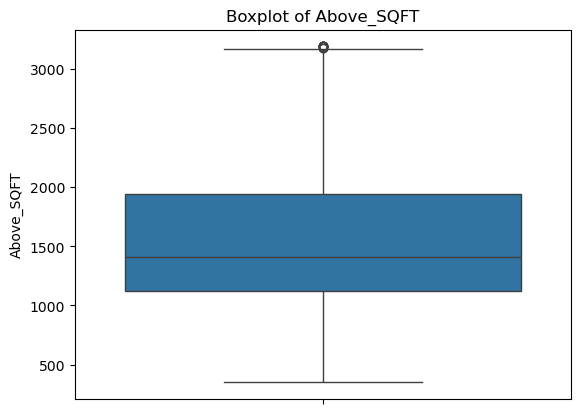

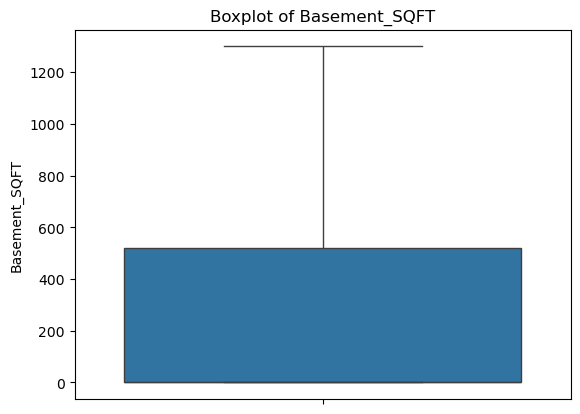

In [878]:
checking_cloumns=['Price','SQFT_Living','Overall_Lot_SQFT','Above_SQFT','Basement_SQFT']
for i in checking_cloumns:
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

## Insights 
### Boxplot Price
- Most housing prices to fall between 250,000 and 600,000.
- There are at least one high outlier above 900,000.
- The distribution looks right-skewed, meaning some houses are much more expensive than average.
 
### Boxplot of SQFT
- Most homes have a living area between 1300 and 2200 sqft.
- The typical home is about 1800 sqft.
- There are some very large homes (above 3500 sqft) that is shown as outliers.
- The distribution looks slightly right-skewed, indicating a few homes with very large square footage.

  ### Boxplot of Overall SQFT
 - Most properties fall within this range from 4,000 to 10,000 square feet.
- There’s a dot above 15,000,one very large lot.
- The distribution looks slightly right-skewed, meaning there are more large lots than small ones.

### Boxplot of above sqft
- Most homes have 1,000–2,000 sq ft of above-ground living area.
- The typical home is about 1,500 sq ft.
- The distribution is right-skewed, meaning a few large homes increase the average.

## Exploratory Data Analysis (EDA)
### 1.Univariate Analysis:

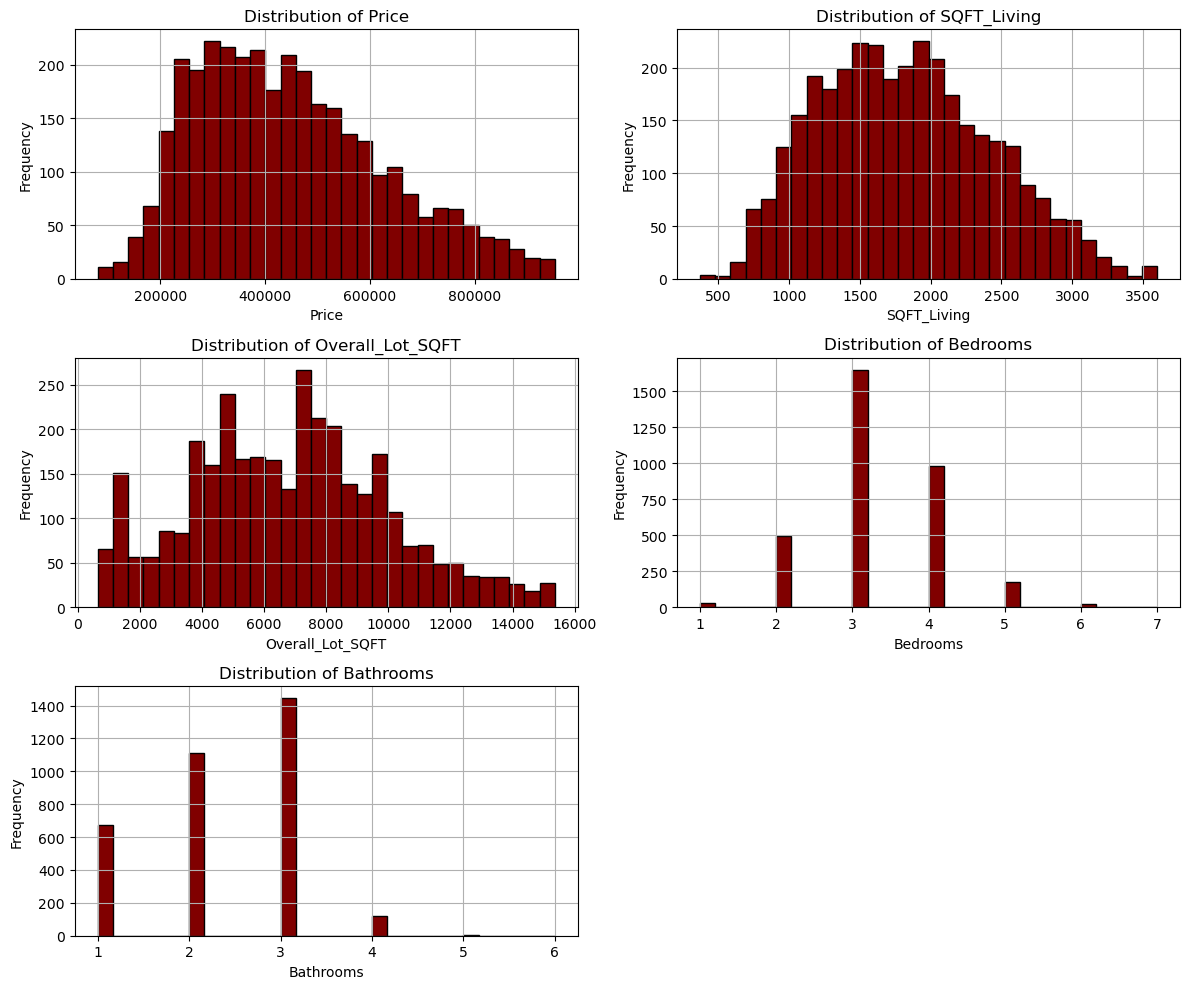

In [884]:
columns = ['Price','SQFT_Living','Overall_Lot_SQFT','Bedrooms', 'Bathrooms']
plt.figure(figsize=(12, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    df[col].hist(bins=30, color='maroon', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Distribution of Price
- ### Most of the homes are priced between 200000 to 600000 with expensive homes (right-skewed).
## Living SQFT
- ### Most of the homes have living area around 1000–2500 sqft. Some very large houses (outliers).
## Overall SQFT
- ### Lot sizes vary slightly; most are small, but a few are very large.
## Bedrooms
- ### Majority of homes have 3 or 4 bedrooms. 6 bedrooms are the least one.
## Bathrooms
- ### Most of the homes have 1–3 bathrooms. More than 4 is rare.

# 2. Bivariate Analysis

In [909]:
df=df.drop(columns=[col for col in ['level_0','index']if col in df.columns])

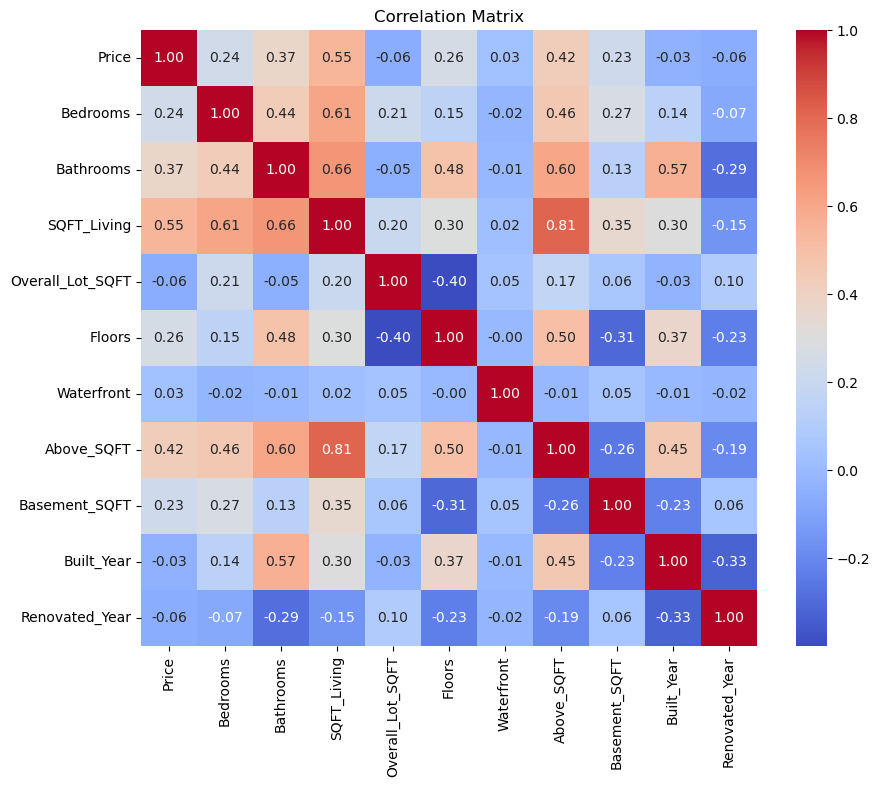

In [911]:
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


### Relationships between price vs sqft_living

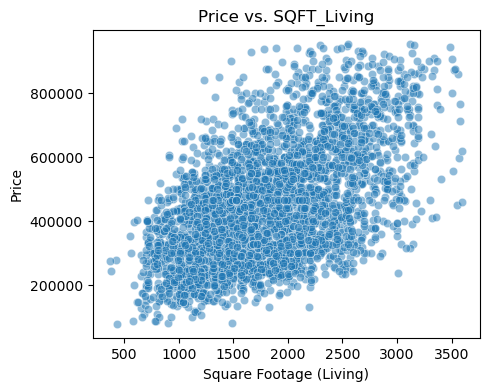

In [919]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='SQFT_Living', y='Price', data=df, alpha=0.5)
plt.title('Price vs. SQFT_Living')
plt.xlabel('Square Footage (Living)')
plt.ylabel('Price')
plt.show()



## Insights from the Scatter Plot:
- As SQFT_Living increases, Price also increases.
- Most homes between SQFT living range is 1000–3000 sqft and Price between 200,000 to 600,000.

In [938]:
df['Condition'].value_counts()

Condition
Average      2106
Good          914
Excellent     321
Fair           18
Poor            2
Name: count, dtype: int64

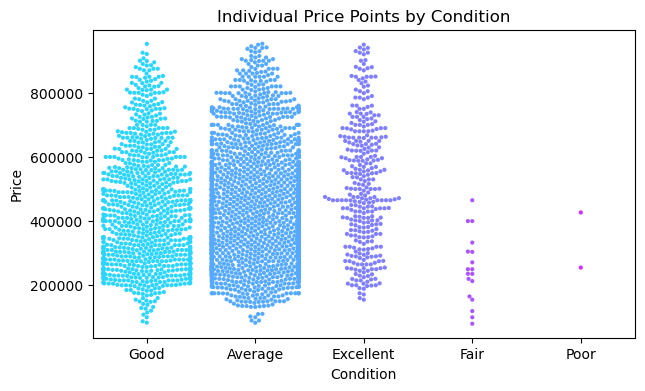

In [942]:
plt.figure(figsize=(7, 4))
sns.swarmplot(x='Condition', y='Price', data=df, palette='cool', size=3)
plt.title("Individual Price Points by Condition")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()


# Insights for swarm plot
- Most houses are in either Good or Average condition.
- Excellent Condition houses are less but high in price.
- Fair and Poor Conditions are very few houses into these categories.
- In both Good and Average conditions there is a large price variance from 200000 to over 700000.

### Relationship between price and view

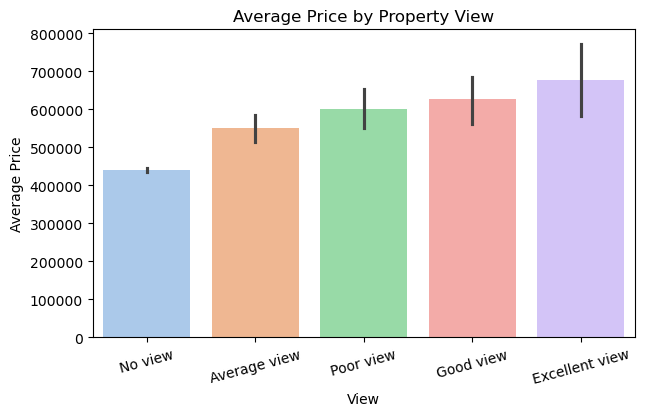

In [952]:
plt.figure(figsize=(7, 4))
sns.barplot(x='View', y='Price', data=df, estimator='mean', palette='pastel')
plt.title("Average Price by Property View")
plt.xlabel("View")
plt.ylabel("Average Price")
plt.xticks(rotation=15)
plt.show()

## Insights for Bar charts 
- Houses with Excellent view have the highest average price while those with No view are the least expensive.
## Analyst for Real estaters 
If you are in real estate investing in properties with good or excellent views so this can possible for higher incomes.


<Figure size 1000x500 with 0 Axes>

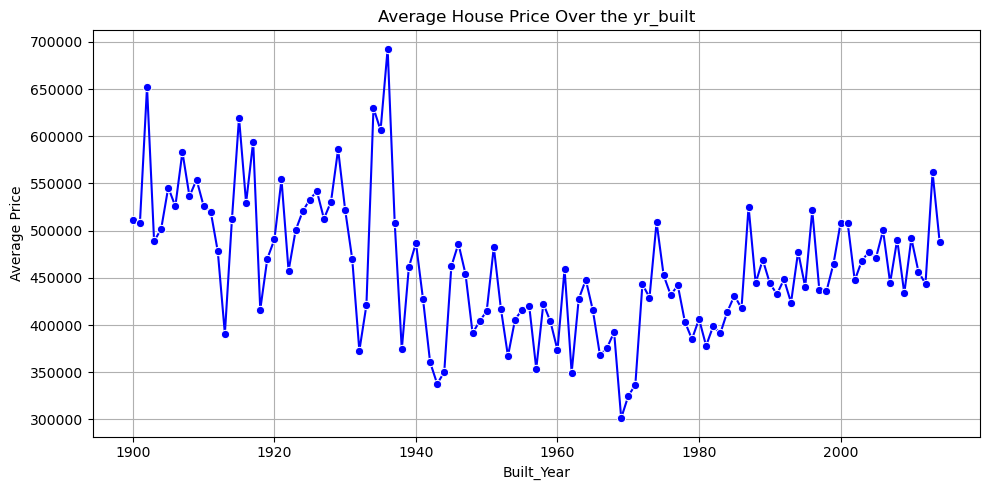

In [969]:
avg_price_per_year =df.groupby('Built_Year')['Price'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Built_Year', y='Price', data=avg_price_per_year, marker='o', color='blue')
plt.title('Average House Price Over the yr_built')
plt.xlabel('Built_Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


# Insights for line plot
- From 1980 onwards average prices generally increase which may reflect the Economic growth and demand for newer houses.
- Houses built after 2000 to have higher average prices it suggests a better amenities, construction costs.

## Count of Properties by Condition

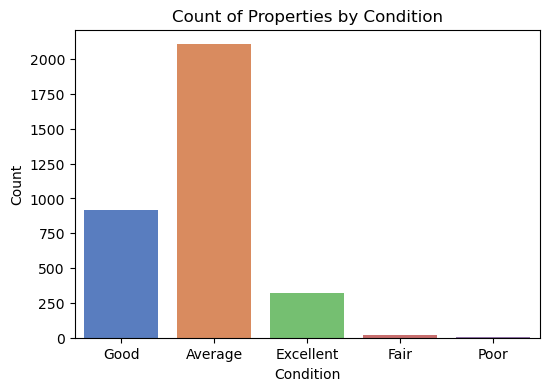

In [977]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Condition', data=df, palette='muted')
plt.title('Count of Properties by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

## Insights for Count plot
- Most properties are in Average Condition and highest bar around 2000 and more.
- May be Owners improving homes before selling their property.



## Number of Properties per City

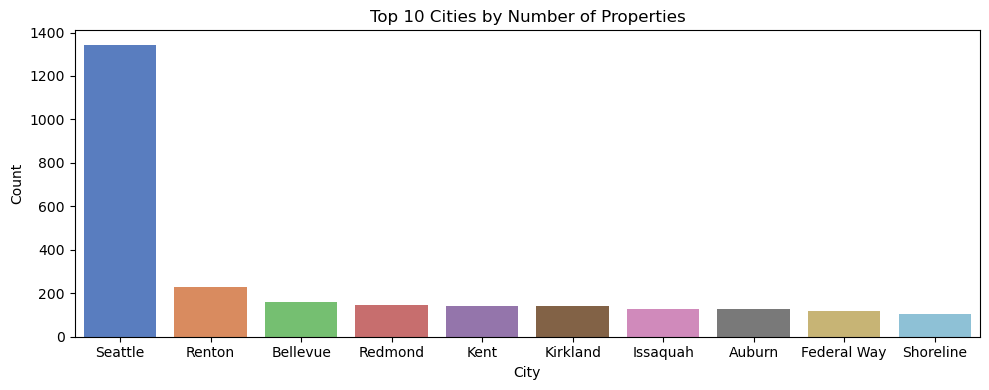

In [1010]:
top_10_cities = df['City'].value_counts().nlargest(10).index
top_10_df = df[df['City'].isin(top_10_cities)]

plt.figure(figsize=(10,4))
sns.countplot(x='City', data=top_10_df, order=top_10_cities, palette='muted')
plt.title('Top 10 Cities by Number of Properties')
plt.xlabel('City')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Insights for count plot 
- Seattle has around 1300+ properties so this is the highest number.
- Suggests it is the major housing hub in the dataset.
- Focus on Seattle for investment,bussiness or marketing because of its higher range .

## Average Housing Price per City

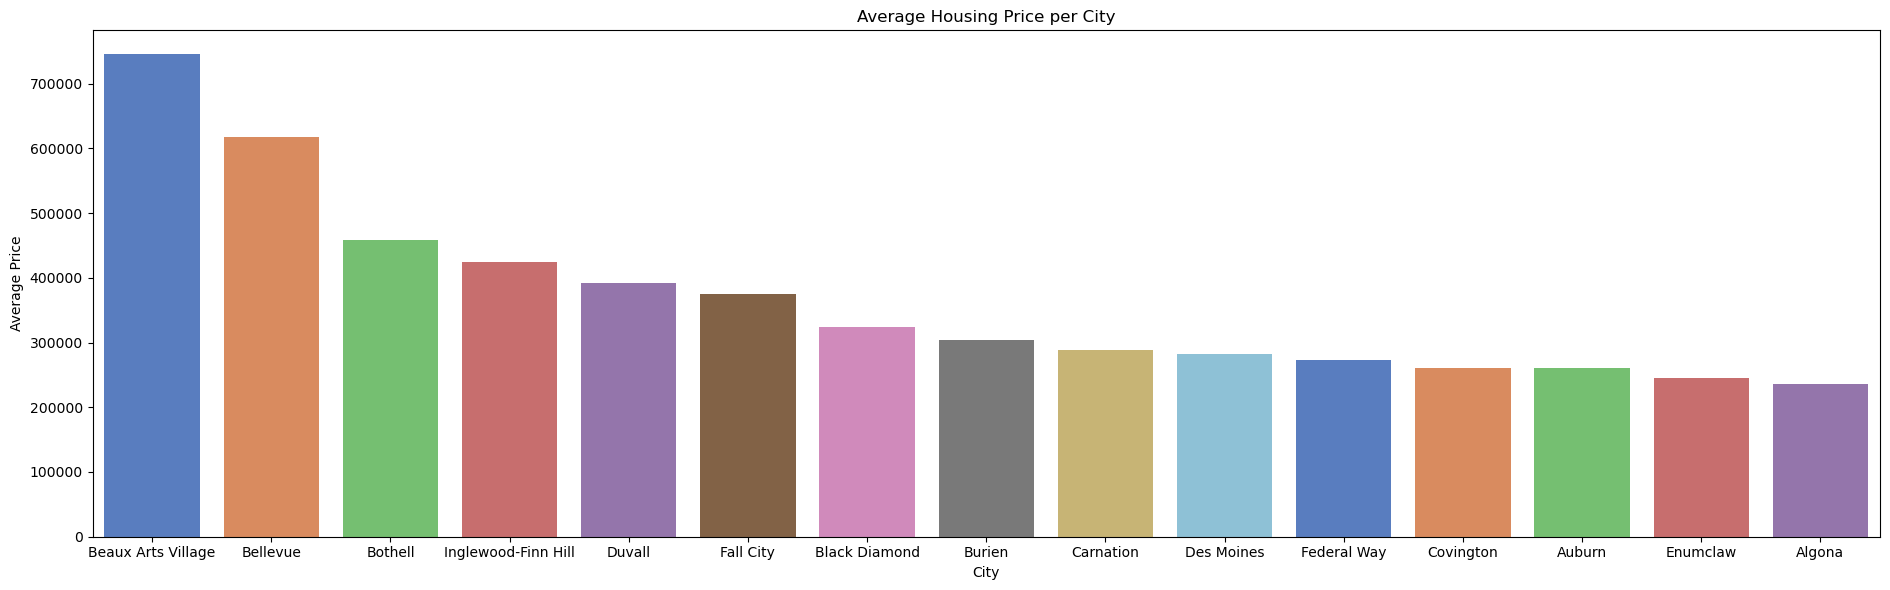

In [1014]:
avg_price_city = df.groupby('City')['Price'].mean().reset_index().head(15)
avg_price_city = avg_price_city.sort_values(by='Price', ascending=False)
plt.figure(figsize=(19,6))
sns.barplot(x='City', y='Price', data=avg_price_city, palette='muted')
plt.title('Average Housing Price per City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


## Insights for Box plot
- Most Expensive City is Beaux Arts Village
- Highest average house price around 750000+.
- Like a luxury or high-income residential area.

# 3. Multivariate Analysis

## Visualizes scatter plots for all pairs and histograms on the diagonal

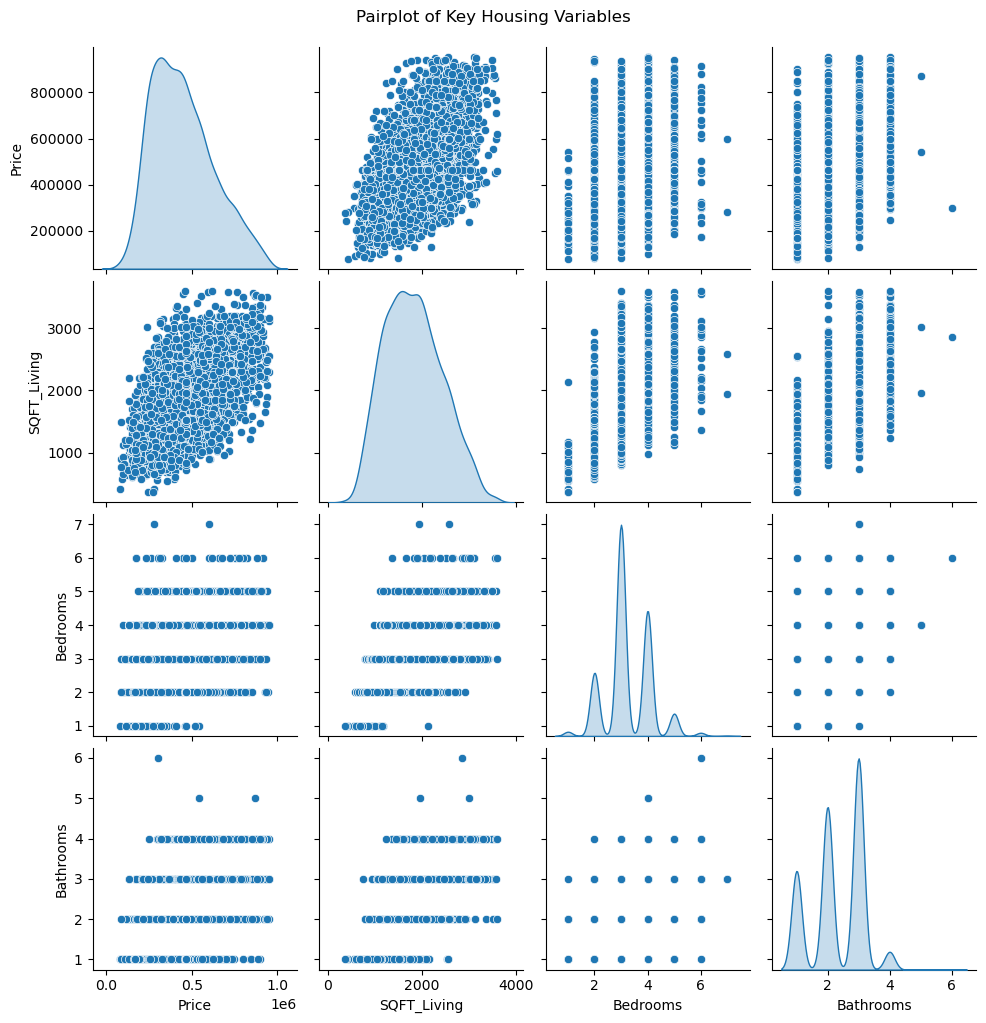

In [1030]:
sns.pairplot(df[['Price','SQFT_Living','Bedrooms','Bathrooms']], diag_kind='kde')
plt.suptitle('Pairplot of Key Housing Variables', y=1.02)
plt.show()

# Feature Engineering

## Age of Property

In [1034]:
from datetime import datetime

current_year = datetime.now().year
df['age_of_Property'] = current_year - df['Built_Year']

In [1036]:
df['age_of_Property'] 

0        52
1        21
2        37
3        35
4        45
       ... 
3602    109
3603    103
3604     17
3605     69
3606     48
Name: age_of_Property, Length: 3361, dtype: int32

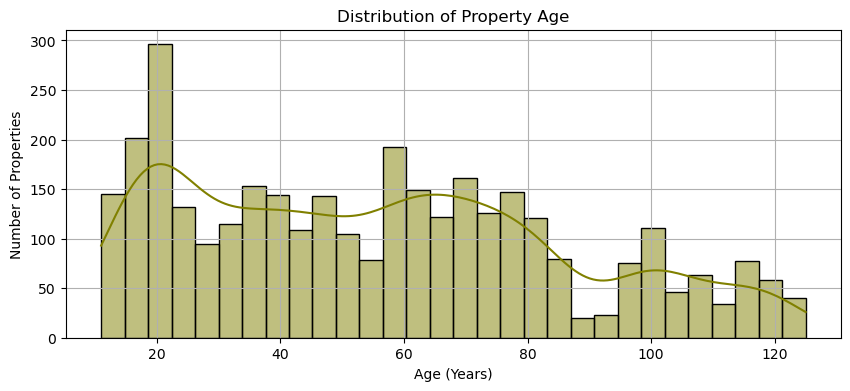

In [1042]:
plt.figure(figsize=(10,4))
sns.histplot(df['age_of_Property'], bins=30, kde=True, color='olive')
plt.title("Distribution of Property Age")
plt.xlabel("Age (Years)")
plt.ylabel("Number of Properties")
plt.grid(True)
plt.show()


In [1058]:
df['month'].value_counts()

month
June    1633
May     1274
July     454
Name: count, dtype: int64

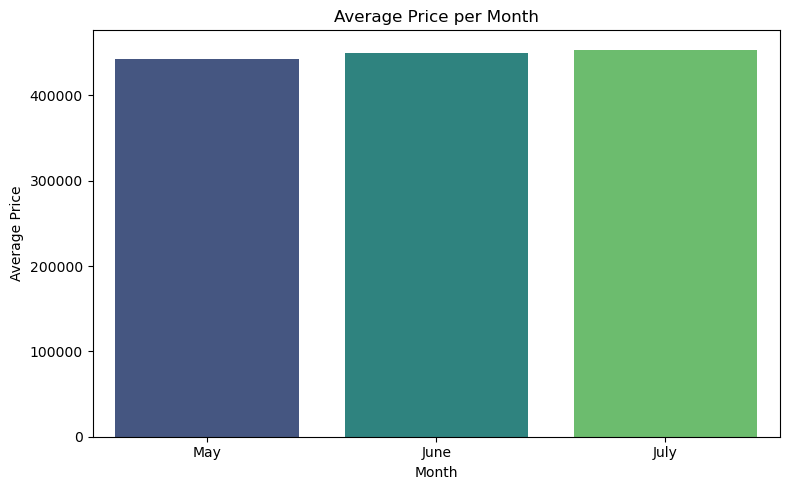

In [1060]:
avg_price_per_month = df.groupby('month')['Price'].mean().reindex(['May', 'June', 'July'])
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_per_month.index, y=avg_price_per_month.values, palette='viridis')
plt.title('Average Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


## Insights
- In this Chart July month has the highest average price 

In [1063]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3361 entries, 0 to 3606
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Registration_Date   3361 non-null   datetime64[ns]
 1   Price               3361 non-null   int32         
 2   Bedrooms            3361 non-null   int64         
 3   Bathrooms           3361 non-null   int32         
 4   SQFT_Living         3361 non-null   float64       
 5   Overall_Lot_SQFT    3361 non-null   float64       
 6   Floors              3361 non-null   int32         
 7   Waterfront          3361 non-null   int64         
 8   View                3361 non-null   object        
 9   Condition           3361 non-null   object        
 10  Above_SQFT          3361 non-null   int64         
 11  Basement_SQFT       3361 non-null   int64         
 12  Built_Year          3361 non-null   int32         
 13  Renovated_Year      3361 non-null   int64         
 1

In [1065]:
df

,Registration_Date,Price,Bedrooms,Bathrooms,SQFT_Living,Overall_Lot_SQFT,Floors,Waterfront,View,Condition,...,Basement_SQFT,Built_Year,Renovated_Year,Street,City,State_Zip,Country,Changed_waterfront,age_of_Property,month
0,2014-05-03,310000,3,1,1010.0,9945.0,1,0,No view,Good,...,0,1973,0,7528 N Fork Rd SE,Snoqualmie,WA 98065,USA,No,52,May
1,2014-05-04,775000,2,3,2680.0,7392.0,1,0,No view,Average,...,0,2004,2003,13134 234th Ct NE,Redmond,WA 98053,USA,No,21,May
2,2014-05-04,365000,3,3,2200.0,7350.0,1,0,No view,Excellent,...,630,1988,0,13420 SE 182nd St,Renton,WA 98058,USA,No,37,May
3,2014-05-04,331950,4,3,2530.0,9933.0,2,0,Average view,Average,...,520,1990,2009,925 48th Ct,Auburn,WA 98092,USA,No,35,May
4,2014-05-04,783500,3,3,2850.0,7130.0,2,0,No view,Average,...,860,1980,0,151 Euclid Ave,Seattle,WA 98122,USA,No,45,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,2014-07-02,318000,2,2,1530.0,3503.0,1,0,Poor view,Good,...,700,1916,0,1922 11th Ave W,Seattle,WA 98119,USA,No,109,July
3603,2014-07-02,550608,4,2,1660.0,4800.0,2,0,No view,Average,...,0,1922,2008,4007 Woodland Park Ave N,Seattle,WA 98103,USA,No,103,July
3604,2014-07-02,584000,3,2,1490.0,1036.0,2,0,No view,Average,...,400,2008,0,4304B 36th Ave W,Seattle,WA 98199,USA,No,17,July
3605,2014-07-02,465000,3,1,1520.0,9030.0,1,0,No view,Average,...,0,1956,2001,2533 155th Pl SE,Bellevue,WA 98007,USA,No,69,July


## Hypothesis Test
- Performing a hypothesis test in two-sample t-test to compare house prices between
- - Houses with single floor
- - Houses with multi floor

In [1081]:
import scipy.stats as stats
# Data seperation
single_floor = df[df['Floors'] == 1.0]['Price']
multi_floor = df[df['Floors'] > 1.0]['Price']
# T-Test 
t_stat, p_value = stats.ttest_ind(single_floor, multi_floor)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-statistic: -16.469098211532955
P-value: 1.1497009630534324e-58
Reject the null hypothesis.


## Null Hypothesis
### There is no difference in average house prices between single-floor and multi-floor houses.
## Alternative Hypothesis
### There is a difference in average house prices between single-floor and multi-floor houses.
# Result
### p-value = 1.1497009630534324e-58 which is way less than 0.05 So we reject the null hypothesis.

In [1071]:
# data seperation
waterfront = df[df['Waterfront'] ==1]['Price']
no_waterfront = df[df['Waterfront'] ==0]['Price']
# Hypotheses test
t_stat, p_value = stats.ttest_ind(waterfront, no_waterfront)
print(f'T-statistic: {t_stat}')
print(f'p-value: {p_value}')
if p_value < 0.05:
    print('Reject the null hypothesis. The average prices are significantly different.')
else:
    print('Fail to reject the null hypothesis. The average prices are not significantly different.')

T-statistic: 1.9186202678899191
p-value: 0.055117073724203165
Fail to reject the null hypothesis. The average prices are not significantly different.


## Null Hypothesis
### There is no significant difference in the average prices of waterfront and non-waterfront homes.
## Alternative Hypothesis
### There is a significant difference in the average prices.
## Output
### p-value = 0.0551 which is slightly more than 0.05.So you fail to reject the null hypothesis.

# Overall Insights 

## Price Insights
- July has the highest average housing price compare to other months.
- Most housing prices between 250,000 to 600,000.
- Some properties are priced above 900,000, indicating high-value outliers.

## City-Level Insights
- Beaux Arts Village is the most expensive city with average prices over 750,000 this is likely luxury housing area .
- Seattle has 1300+ properties making it the most common city in major housing hub .

## Multivariate & Trend Insights
- SQFT_Living has a positive correlation with Price larger homes cost is more.
- Most homes have 3 or 4 bedrooms and 1–3 bathrooms.
- Homes in excellent condition are few but are priced the highest.
- Most homes are in good or average condition.

## Investment Recommendations
- Focus on properties in Seattle for volume-based opportunities.
- Luxury areas like Beaux Arts Village can target rich buyers.
- Prioritise houses with good views and newer construction for better resale value.